In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

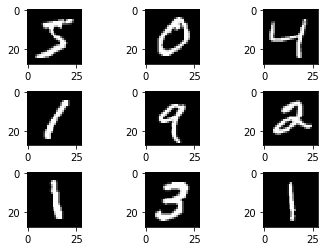

In [3]:
# Plot Data
fig = plt.figure()
fig.subplots_adjust(hspace=0.5)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(xtrain[i], cmap='gray')
plt.show()

In [4]:
img_size = (28,28)

In [5]:
if(K.image_data_format() == 'channels_first'):
    xtrain = xtrain.reshape(xtrain.shape[0], 1, img_size[0], img_size[1])
    xtest = xtest.reshape(xtest.shape[0], 1, img_size[0], img_size[1])
    input_shape = (1, img_size[0], img_size[1])
else:
    xtrain = xtrain.reshape(xtrain.shape[0], img_size[0], img_size[1], 1)
    xtest = xtest.reshape(xtest.shape[0], img_size[0], img_size[1], 1)
    input_shape = (img_size[0], img_size[1], 1)

In [6]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

xtrain /= 255
xtest /= 255

In [7]:
batch_size = 128
num_classes = 10
epochs = 10

In [8]:
# convert class vectors to binary class matrices
ytrain = keras.utils.to_categorical(ytrain, num_classes)
ytest = keras.utils.to_categorical(ytest, num_classes)

### Model

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)             

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [11]:
model.fit(xtrain, ytrain,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(xtest, ytest))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.2722 - accuracy: 0.9156 - val_loss: 0.0603 - val_accuracy: 0.9804
Epoch 2/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0899 - accuracy: 0.9740 - val_loss: 0.0401 - val_accuracy: 0.9866
Epoch 3/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0673 - accuracy: 0.9799 - val_loss: 0.0338 - val_accuracy: 0.9881
Epoch 4/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0555 - accuracy: 0.9827 - val_loss: 0.0334 - val_accuracy: 0.9882
Epoch 5/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0479 - accuracy: 0.9857 - val_loss: 0.0308 - val_accuracy: 0.9893
Epoch 6/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0420 - accuracy: 0.9873 - val_loss: 0.0300 - val_accuracy: 0.9899
Epoch 7/10
60000/60000 [==============================] - 120s 

In [12]:
score = model.evaluate(xtest, ytest, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02876013718682698
Test accuracy: 0.991100013256073
